## Pandasを使ってデータ集めから分析まで行う！

・ちょっと終盤には機械学習、ディープラーニングのライブラリも使いますが・・・

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 価格データをGET !

・　requestsとBeautifulSoup4とかでなく、Pandasで！    
・　取得サイトは株価データサイト　k-db.comより　http://k-db.com/     
・　いろいろな都合から日経平均先物の4本足を使う

In [3]:
years = [2007,2008, 2009, 2010, 2011, 2012, 2013,2014, 2015, 2016, 2017]
df = {}
for year in years:
    df['{}'.format(year)] = pd.read_csv('http://k-db.com/futures/F101-0000/1d/{}?download=csv'.format(year), encoding='shift-jis')

In [4]:
dfAll = pd.concat([df['2007'], df['2008'], df['2009'], df['2010'], df['2011'], df['2012'], \
                   df['2013'], df['2014'], df['2015'], df['2016'],df['2017']], axis=0)

In [5]:
dfAll

,日付,時刻,始値,高値,安値,終値,出来高,売買代金
0,2007-12-28,夜間,NaN,NaN,NaN,NaN,0,0
1,2007-12-28,日中,15430.0,15440.0,15240.0,15250.0,46929,719722440
2,2007-12-27,夜間,15580.0,15610.0,15550.0,15590.0,1832,28544890
3,2007-12-27,日中,15650.0,15670.0,15560.0,15600.0,43309,676032430
4,2007-12-26,夜間,15710.0,15720.0,15690.0,15720.0,1341,21063610
5,2007-12-26,日中,15650.0,15730.0,15600.0,15710.0,34774,544393370
6,2007-12-25,夜間,15660.0,15680.0,15640.0,15660.0,1535,24044340
7,2007-12-25,日中,15640.0,15650.0,15530.0,15640.0,46910,731622300
8,2007-12-21,夜間,15340.0,15450.0,15330.0,15450.0,3026,46561520
9,2007-12-21,日中,15090.0,15330.0,15030.0,15320.0,100168,1522794260


## 一先ずデータが読み込めました

## ここから使いたい形に直します。

In [6]:
dfAll.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Last', 'Volume', 'Amount']   
dfAll1 = dfAll[dfAll['Time'] == '日中']
dfAll1.index = dfAll1['Date']
dfAll1 = dfAll1[['Open', 'High', 'Low', 'Last']]
dfAll2 = dfAll1.dropna()
dfAll3 = dfAll2.sort_index()

In [7]:
dfAll3

,Open,High,Low,Last
Date,,,,
2007-01-04,17350.0,17390.0,17330.0,17360.0
2007-01-05,17310.0,17340.0,17020.0,17080.0
2007-01-09,17000.0,17290.0,16990.0,17260.0
2007-01-10,17230.0,17240.0,16860.0,16950.0
2007-01-11,16980.0,17080.0,16770.0,16860.0
2007-01-12,17010.0,17180.0,16950.0,17080.0
2007-01-15,17150.0,17290.0,17140.0,17250.0
2007-01-16,17220.0,17310.0,17190.0,17250.0
2007-01-17,17150.0,17370.0,17010.0,17270.0


## まずは日本が取引していない時間は株価が上がり、
## 日本が取引している時間は株価が下がるという傾向について調べます

In [8]:
dfAll3['L-C'] = dfAll3['Last'] - dfAll3['Open']
dfAll3['ON'] = 0
for i in range(1, len(dfAll3)-1):
    dfAll3.iloc[i, 5] = dfAll3.iloc[i, 0] - dfAll3.iloc[i-1, 3]

In [9]:
dfAll3

,Open,High,Low,Last,L-C,ON
Date,,,,,,
2007-01-04,17350.0,17390.0,17330.0,17360.0,10.0,0.0
2007-01-05,17310.0,17340.0,17020.0,17080.0,-230.0,-50.0
2007-01-09,17000.0,17290.0,16990.0,17260.0,260.0,-80.0
2007-01-10,17230.0,17240.0,16860.0,16950.0,-280.0,-30.0
2007-01-11,16980.0,17080.0,16770.0,16860.0,-120.0,30.0
2007-01-12,17010.0,17180.0,16950.0,17080.0,70.0,150.0
2007-01-15,17150.0,17290.0,17140.0,17250.0,100.0,70.0
2007-01-16,17220.0,17310.0,17190.0,17250.0,30.0,-30.0
2007-01-17,17150.0,17370.0,17010.0,17270.0,120.0,-100.0


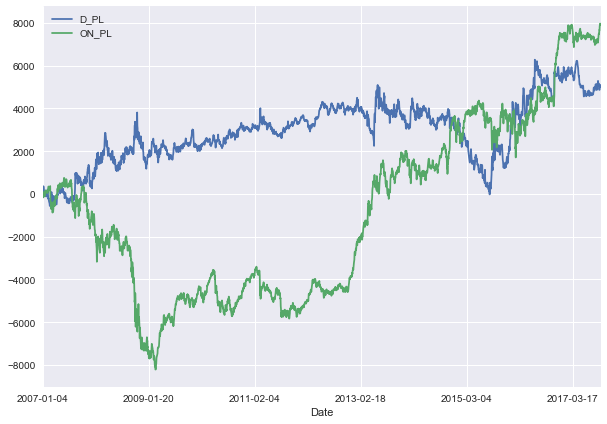

In [10]:
dfAll3['D_PL'] = -(dfAll3['L-C'].cumsum())
dfAll3['ON_PL'] = dfAll3['ON'].cumsum()

dfAll3[['D_PL', 'ON_PL']].plot(figsize=(10,7))

## ちなみに本なんかでは2000年からのものが載っています

<img src="test/testPL.png">

## テクニカル分析行う
・　テクニカル分析には順張り（上がるものは上がる）と考えるものと逆張り（上がり続けるものはない）と    
  の2つの考え方があります。また、その中でも種類はたくさんありますが、今回は順張りの代表例として     
  移動平均線を使ってトレードシミュレーションを行ってみます。

・　ロスカットや利食いなどを普通はつけますが、単純化のために買いシグナルがでたら買いポジションを保有し、   
売りシグナルがでたら売りポジションに転換するという方法を取ります。一回目のシグナルが出たらずっとポジションを持っていることになります。

In [11]:
dfAll4 = dfAll3[['Open', 'High', 'Low', 'Last']]
dfAll5 = dfAll4.copy()

In [12]:
dfAll5['ma5'] = dfAll5['Last'].rolling(5).mean()
dfAll5['ma20'] = dfAll5['Last'].rolling(20).mean()
dfAll5['ma25'] = dfAll5['Last'].rolling(25).mean()
dfAll5.head()

,Open,High,Low,Last,ma5,ma20,ma25
Date,,,,,,,
2007-01-04,17350.0,17390.0,17330.0,17360.0,NaN,NaN,NaN
2007-01-05,17310.0,17340.0,17020.0,17080.0,NaN,NaN,NaN
2007-01-09,17000.0,17290.0,16990.0,17260.0,NaN,NaN,NaN
2007-01-10,17230.0,17240.0,16860.0,16950.0,NaN,NaN,NaN
2007-01-11,16980.0,17080.0,16770.0,16860.0,17102.0,NaN,NaN


In [13]:
dfAll5 = dfAll5.dropna()
dfAll5.head()

,Open,High,Low,Last,ma5,ma20,ma25
Date,,,,,,,
2007-02-08,17390.0,17410.0,17220.0,17280.0,17388.0,17383.0,17326.8
2007-02-09,17330.0,17550.0,17290.0,17510.0,17372.0,17404.5,17332.8
2007-02-13,17460.0,17640.0,17450.0,17600.0,17422.0,17422.0,17353.6
2007-02-14,17650.0,17800.0,17650.0,17780.0,17492.0,17448.5,17374.4
2007-02-15,17930.0,17940.0,17820.0,17890.0,17612.0,17479.5,17412.0


In [14]:
# シグナル定義。短期線が長期線を超えたら買い、短期線が長期線を割ったら売り。

def BuySignal(data, i):
    return data.iloc[i, 4] > data.iloc[i, 5] and data.iloc[i-1,4] < data.iloc[i-1, 5]

def SellSignal(data, i):
    return data.iloc[i, 4] < data.iloc[i, 5] and data.iloc[i-1, 4] > data.iloc[i-1, 5]

def BuyClose(data, i):
    return SellSignal(data, i)

def SellClose(data, i):
    return BuySignal(data, i)

In [15]:
dfAll5['Buy'] = 0
dfAll5['Sell'] = 0
for i in range(1, len(dfAll5)-1):
    if BuySignal(dfAll5, i) and dfAll5.iloc[i, 7] == 0:
        dfAll5.iloc[i+1, 7] = 1
    elif BuyClose(dfAll5, i) and dfAll5.iloc[i, 7] == 1:
        dfAll5.iloc[i+1, 7] = 0
    else:
        dfAll5.iloc[i+1, 7] = dfAll5.iloc[i, 7]
        
    if SellSignal(dfAll5, i) and dfAll5.iloc[i, 8] == 0:
        dfAll5.iloc[i+1, 8] = 1
    elif SellClose(dfAll5, i) and dfAll5.iloc[i, 8] == 1:
        dfAll5.iloc[i+1, 8] = 0
    else:
        dfAll5.iloc[i+1, 8] = dfAll5.iloc[i, 8]

In [16]:
dfAll5

,Open,High,Low,Last,ma5,ma20,ma25,Buy,Sell
Date,,,,,,,,,
2007-02-08,17390.0,17410.0,17220.0,17280.0,17388.0,17383.0,17326.8,0,0
2007-02-09,17330.0,17550.0,17290.0,17510.0,17372.0,17404.5,17332.8,0,0
2007-02-13,17460.0,17640.0,17450.0,17600.0,17422.0,17422.0,17353.6,0,1
2007-02-14,17650.0,17800.0,17650.0,17780.0,17492.0,17448.5,17374.4,0,1
2007-02-15,17930.0,17940.0,17820.0,17890.0,17612.0,17479.5,17412.0,0,1
2007-02-16,17820.0,17900.0,17790.0,17870.0,17730.0,17504.0,17452.4,0,1
2007-02-19,17830.0,17980.0,17810.0,17920.0,17812.0,17534.0,17486.0,0,1
2007-02-20,17920.0,17960.0,17820.0,17960.0,17884.0,17561.5,17514.4,0,1
2007-02-21,17890.0,17970.0,17850.0,17930.0,17914.0,17587.0,17541.6,0,1


In [17]:
dfAll5['BuyS'] = dfAll5['Buy'].diff(1)
dfAll5['SellS'] = dfAll5['Sell'].diff(1)
dfAll5.head()

,Open,High,Low,Last,ma5,ma20,ma25,Buy,Sell,BuyS,SellS
Date,,,,,,,,,,,
2007-02-08,17390.0,17410.0,17220.0,17280.0,17388.0,17383.0,17326.8,0,0,NaN,NaN
2007-02-09,17330.0,17550.0,17290.0,17510.0,17372.0,17404.5,17332.8,0,0,0.0,0.0
2007-02-13,17460.0,17640.0,17450.0,17600.0,17422.0,17422.0,17353.6,0,1,0.0,1.0
2007-02-14,17650.0,17800.0,17650.0,17780.0,17492.0,17448.5,17374.4,0,1,0.0,0.0
2007-02-15,17930.0,17940.0,17820.0,17890.0,17612.0,17479.5,17412.0,0,1,0.0,0.0


In [18]:
dfAll5['B_PL'] = 0
dfAll5['S_PL'] = 0

for i in range(1, len(dfAll5)):
    if dfAll5.iloc[i, 9] == 1:
        buyprice = dfAll5.iloc[i, 0]
        dfAll5.iloc[i, 9] = buyprice
    elif dfAll5.iloc[i, 9] == -1:
        closeprice = dfAll5.iloc[i, 0]
        dfAll5.iloc[i, 9] = closeprice
        dfAll5.iloc[i, 11] = closeprice - buyprice
    else:
        pass
    
    if dfAll5.iloc[i, 10] == 1:
        sellprice = dfAll5.iloc[i, 0]
        dfAll5.iloc[i, 10] = sellprice
    elif dfAll5.iloc[i, 10] == -1:
        closeprice = dfAll5.iloc[i, 0]
        dfAll5.iloc[i, 10] = closeprice
        dfAll5.iloc[i, 12] = sellprice - closeprice
    else:
        pass

In [19]:
dfAll5

,Open,High,Low,Last,ma5,ma20,ma25,Buy,Sell,BuyS,SellS,B_PL,S_PL
Date,,,,,,,,,,,,,
2007-02-08,17390.0,17410.0,17220.0,17280.0,17388.0,17383.0,17326.8,0,0,NaN,NaN,0.0,0.0
2007-02-09,17330.0,17550.0,17290.0,17510.0,17372.0,17404.5,17332.8,0,0,0.0,0.0,0.0,0.0
2007-02-13,17460.0,17640.0,17450.0,17600.0,17422.0,17422.0,17353.6,0,1,0.0,17460.0,0.0,0.0
2007-02-14,17650.0,17800.0,17650.0,17780.0,17492.0,17448.5,17374.4,0,1,0.0,0.0,0.0,0.0
2007-02-15,17930.0,17940.0,17820.0,17890.0,17612.0,17479.5,17412.0,0,1,0.0,0.0,0.0,0.0
2007-02-16,17820.0,17900.0,17790.0,17870.0,17730.0,17504.0,17452.4,0,1,0.0,0.0,0.0,0.0
2007-02-19,17830.0,17980.0,17810.0,17920.0,17812.0,17534.0,17486.0,0,1,0.0,0.0,0.0,0.0
2007-02-20,17920.0,17960.0,17820.0,17960.0,17884.0,17561.5,17514.4,0,1,0.0,0.0,0.0,0.0
2007-02-21,17890.0,17970.0,17850.0,17930.0,17914.0,17587.0,17541.6,0,1,0.0,0.0,0.0,0.0


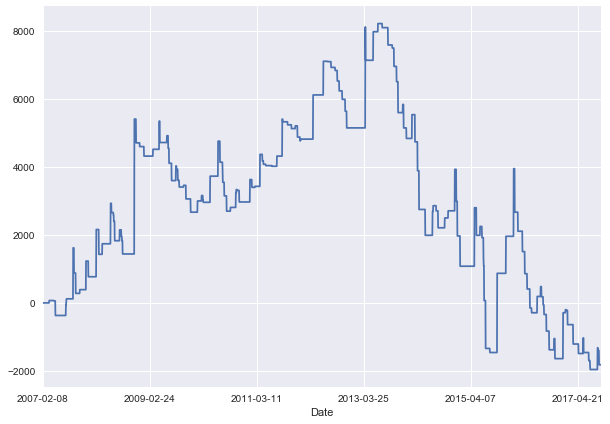

In [20]:
dfAll5['PL_cumsum'] = dfAll5['B_PL'].cumsum() + dfAll5['S_PL'].cumsum()
dfAll5['PL_cumsum'].plot(figsize=(10,7))

In [21]:
dfAll6 = dfAll4.copy()

In [22]:
dfAll6.head()

,Open,High,Low,Last
Date,,,,
2007-01-04,17350.0,17390.0,17330.0,17360.0
2007-01-05,17310.0,17340.0,17020.0,17080.0
2007-01-09,17000.0,17290.0,16990.0,17260.0
2007-01-10,17230.0,17240.0,16860.0,16950.0
2007-01-11,16980.0,17080.0,16770.0,16860.0


## 機械学習を使ってみる
・　ハイパーパラメーター問題などもありながらも儲かるのであればなんでも良いということで試してみます。

In [23]:
from sklearn import tree
from sklearn import svm

In [24]:
dfAll6['Chg'] = dfAll6['Last'].pct_change()
dfAll6['c-o'] = dfAll6['Last'] - dfAll6['Open']
dfAll6 = dfAll6.dropna()
dfAll6.head()

,Open,High,Low,Last,Chg,c-o
Date,,,,,,
2007-01-05,17310.0,17340.0,17020.0,17080.0,-0.016129,-230.0
2007-01-09,17000.0,17290.0,16990.0,17260.0,0.010539,260.0
2007-01-10,17230.0,17240.0,16860.0,16950.0,-0.017961,-280.0
2007-01-11,16980.0,17080.0,16770.0,16860.0,-0.005310,-120.0
2007-01-12,17010.0,17180.0,16950.0,17080.0,0.013049,70.0


## データを作成します

In [25]:
data_teach = dfAll6[:-100].copy()
data_test = dfAll6[-100:].copy()

In [26]:
def predict_data(data, data2, n = 20):
    X = []
    y = []
    
    x_test = []
    y_test = []
    
    for i in range(len(data) - n):
        X.append(data.iloc[i: (i+n-1) , 4].values)
        if data.iloc[(i+n), 5] > 0:
            y.append(1)
        else:
            y.append(-1)
            
    for i in range(len(data2) - n):
        x_test.append(data2.iloc[i: (i + n -1), 4].values)
        if data2.iloc[(i+n), 5] > 0:
            y_test.append(1)
        else:
            y_test.append(-1)
            
    return X, y, x_test, y_test

In [27]:
data = predict_data(data_teach, data_test)

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data[0],  data[1])
pred_y = clf.predict(data[2])

In [29]:
cnt = 0
for i in range(len(pred_y)):
    if pred_y[i] == data[3][i]:
        cnt +=1
    
print('正答率：　{}'.format(cnt / len(pred_y)))

正答率：　0.475


In [30]:
print(pred_y)

[-1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1
  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1
  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1
 -1 -1  1  1 -1]


In [31]:
for i in range(3,40):
    data = predict_data(data_teach, data_test, n = i)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(data[0], data[1])
    pred_y = clf.predict(data[2])
    
    cnt = 0
    
    for i2 in range(len(pred_y)):
        if pred_y[i2] == data[3][i2]:
            cnt +=1
    
    print('日数：{}、正答率：{}'.format(i, cnt/ len(pred_y)))

日数：3、正答率：0.4948453608247423
日数：4、正答率：0.4791666666666667
日数：5、正答率：0.5052631578947369
日数：6、正答率：0.5319148936170213
日数：7、正答率：0.5483870967741935
日数：8、正答率：0.5108695652173914
日数：9、正答率：0.45054945054945056
日数：10、正答率：0.4888888888888889
日数：11、正答率：0.449438202247191
日数：12、正答率：0.38636363636363635
日数：13、正答率：0.42528735632183906
日数：14、正答率：0.47674418604651164
日数：15、正答率：0.47058823529411764
日数：16、正答率：0.5714285714285714
日数：17、正答率：0.5421686746987951
日数：18、正答率：0.5365853658536586
日数：19、正答率：0.5061728395061729
日数：20、正答率：0.45
日数：21、正答率：0.43037974683544306
日数：22、正答率：0.44871794871794873
日数：23、正答率：0.45454545454545453
日数：24、正答率：0.5
日数：25、正答率：0.5333333333333333
日数：26、正答率：0.40540540540540543
日数：27、正答率：0.4931506849315068
日数：28、正答率：0.5277777777777778
日数：29、正答率：0.5633802816901409
日数：30、正答率：0.5428571428571428
日数：31、正答率：0.6086956521739131
日数：32、正答率：0.6029411764705882
日数：33、正答率：0.5373134328358209
日数：34、正答率：0.5454545454545454
日数：35、正答率：0.5846153846153846
日数：36、正答率：0.515625
日数：37、正答率：0.6031746031746031
日数：38、正答率：0.59677419354

In [32]:
prediction = {}
prediction = pd.DataFrame(prediction)

for i in range(1, 11):
    kakuritsu = []
    for i2 in range(3,40):
        data = predict_data(data_teach, data_test, n = i2)
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(data[0], data[1])
        pred_y = clf.predict(data[2])

        cnt = 0
        for i3 in range(len(pred_y)):
            if pred_y[i3] == data[3][i3]:
                cnt += 1
        kakuritsu.append(cnt/len(pred_y))
        
    prediction[i] = kakuritsu

In [33]:
prediction.index = [x for x in range(3,40)]

In [34]:
prediction.T.mean()

3     0.487629
4     0.472917
5     0.489474
6     0.534043
7     0.565591
8     0.484783
9     0.487912
10    0.502222
11    0.473034
12    0.409091
13    0.413793
14    0.472093
15    0.464706
16    0.569048
17    0.532530
18    0.523171
19    0.486420
20    0.445000
21    0.449367
22    0.476923
23    0.464935
24    0.465789
25    0.545333
26    0.439189
27    0.531507
28    0.523611
29    0.530986
30    0.517143
31    0.614493
32    0.542647
33    0.535821
34    0.533333
35    0.570769
36    0.525000
37    0.561905
38    0.564516
39    0.509836
dtype: float64

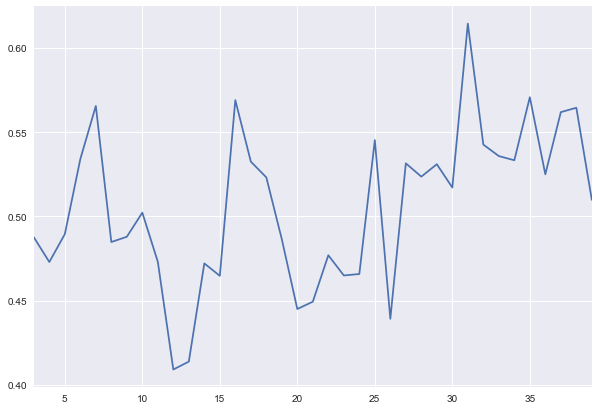

In [35]:
prediction.T.mean().plot(figsize=(10,7))

In [36]:
cl2 = svm.SVC()

In [37]:
cl2 = cl2.fit(data[0], data[1])
pred_y2 = cl2.predict(data[2])

In [38]:
cnt = 0
for i in range(len(pred_y2)):
    if pred_y2[i] == data[3][i]:
        cnt += 1
    
print(cnt/ len(pred_y2))

0.5901639344262295


In [41]:
print(pred_y2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [42]:
pred_svc = {}
pred_svc = pd.DataFrame(pred_svc)

for i in range(1,11):
    prob = []
    for i2 in range(3,40):
        data = predict_data(data_teach, data_test, n = i2)
        cl2 = svm.SVC()
        cl2 = cl2.fit(data[0], data[1])
        pred_y = cl2.predict(data[2])
        
        cnt = 0
        for i3 in range(len(pred_y)):
            if pred_y[i3] == data[3][i3]:
                cnt +=1
        prob.append(cnt/len(pred_y))
        
    pred_svc[i] = prob

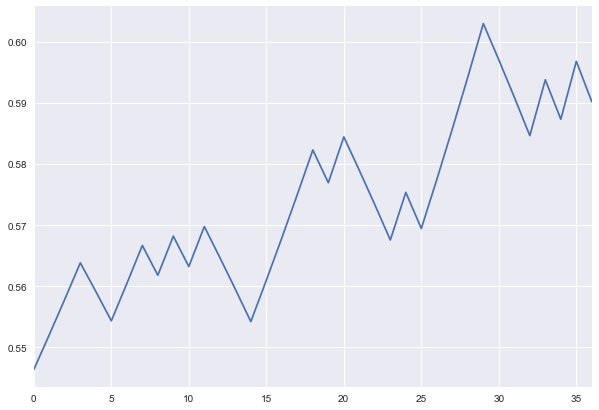

In [43]:
pred_svc.T.mean().plot(figsize=(10,7))

In [44]:
pred_svc.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,10.000000,1.000000e+01,1.000000e+01,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,...,1.000000e+01,10.000000,1.000000e+01,10.000000,10.000000,1.000000e+01,10.00000,1.000000e+01,10.000000,1.000000e+01
mean,0.546392,5.520833e-01,5.578947e-01,0.56383,5.591398e-01,5.543478e-01,5.604396e-01,5.666667e-01,0.561798,0.568182,...,5.857143e-01,0.594203,6.029412e-01,0.597015,0.590909,5.846154e-01,0.59375,5.873016e-01,0.596774,5.901639e-01
std,0.000000,1.170278e-16,1.170278e-16,0.00000,1.170278e-16,1.170278e-16,1.170278e-16,1.170278e-16,0.000000,0.000000,...,1.170278e-16,0.000000,1.170278e-16,0.000000,0.000000,1.170278e-16,0.00000,1.170278e-16,0.000000,1.170278e-16
min,0.546392,5.520833e-01,5.578947e-01,0.56383,5.591398e-01,5.543478e-01,5.604396e-01,5.666667e-01,0.561798,0.568182,...,5.857143e-01,0.594203,6.029412e-01,0.597015,0.590909,5.846154e-01,0.59375,5.873016e-01,0.596774,5.901639e-01
25%,0.546392,5.520833e-01,5.578947e-01,0.56383,5.591398e-01,5.543478e-01,5.604396e-01,5.666667e-01,0.561798,0.568182,...,5.857143e-01,0.594203,6.029412e-01,0.597015,0.590909,5.846154e-01,0.59375,5.873016e-01,0.596774,5.901639e-01
50%,0.546392,5.520833e-01,5.578947e-01,0.56383,5.591398e-01,5.543478e-01,5.604396e-01,5.666667e-01,0.561798,0.568182,...,5.857143e-01,0.594203,6.029412e-01,0.597015,0.590909,5.846154e-01,0.59375,5.873016e-01,0.596774,5.901639e-01
75%,0.546392,5.520833e-01,5.578947e-01,0.56383,5.591398e-01,5.543478e-01,5.604396e-01,5.666667e-01,0.561798,0.568182,...,5.857143e-01,0.594203,6.029412e-01,0.597015,0.590909,5.846154e-01,0.59375,5.873016e-01,0.596774,5.901639e-01
max,0.546392,5.520833e-01,5.578947e-01,0.56383,5.591398e-01,5.543478e-01,5.604396e-01,5.666667e-01,0.561798,0.568182,...,5.857143e-01,0.594203,6.029412e-01,0.597015,0.590909,5.846154e-01,0.59375,5.873016e-01,0.596774,5.901639e-01


In [45]:
pred_svc

,1,2,3,4,5,6,7,8,9,10
0,0.546392,0.546392,0.546392,0.546392,0.546392,0.546392,0.546392,0.546392,0.546392,0.546392
1,0.552083,0.552083,0.552083,0.552083,0.552083,0.552083,0.552083,0.552083,0.552083,0.552083
2,0.557895,0.557895,0.557895,0.557895,0.557895,0.557895,0.557895,0.557895,0.557895,0.557895
3,0.563830,0.563830,0.563830,0.563830,0.563830,0.563830,0.563830,0.563830,0.563830,0.563830
4,0.559140,0.559140,0.559140,0.559140,0.559140,0.559140,0.559140,0.559140,0.559140,0.559140
5,0.554348,0.554348,0.554348,0.554348,0.554348,0.554348,0.554348,0.554348,0.554348,0.554348
6,0.560440,0.560440,0.560440,0.560440,0.560440,0.560440,0.560440,0.560440,0.560440,0.560440
7,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667
8,0.561798,0.561798,0.561798,0.561798,0.561798,0.561798,0.561798,0.561798,0.561798,0.561798
9,0.568182,0.568182,0.568182,0.568182,0.568182,0.568182,0.568182,0.568182,0.568182,0.568182


In [46]:
from sklearn.metrics import classification_report, accuracy_score

In [47]:
print('{}'.format(classification_report(data[3], pred_y2)))

             precision    recall  f1-score   support

         -1       0.59      1.00      0.74        36
          1       0.00      0.00      0.00        25

avg / total       0.35      0.59      0.44        61



/Users/H/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
print()